# Exploring the Circular-Cylindrical (CC) model

This Jupyter notebook shows how the EC magnetic flux rope model class can be used.

## 1. Import paths and libraries

In [56]:
# This is needed to import the CC and EC Models from this location in this project.
import sys
sys.path.append("../..")

In [57]:
from MagneticFluxRopeModels.CCModel import CCModel
from MagneticFluxRopeModels.ECModel import ECModel
from MagneticFluxRopeModels.LundquistModel import LundquistModel

## 2. Instantiate a new EC Model

In [58]:
selected_model = "ECModel"

if selected_model == "CCModel":

    # Create an instance of the EC model. We will start with the simplest case, the circular-cylindrical (CC) model.
    my_model = CCModel(R=0.05)

elif selected_model == "ECModel":
    my_model = ECModel(delta=0.7, psi=0.0)

elif selected_model == "LundquistModel":
    my_model = LundquistModel()

# The EC model can be printed, which provides a detailed description of its parameters.
print(my_model)

ECModel with parameters:
        - Geometrical:
            - delta = 0.70
            - psi = 0.00 deg
            - R = 0.05 AU
        - Field:
            - n = 1
            - m = 0
            - tau = 1.3
            - C_nm = 1.0
            - B_z_0 = 10.0
            - handedness = 1.


## 3. Explore the geometry of the magnetic flux rope

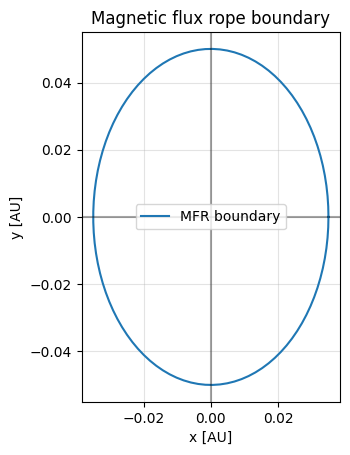

In [59]:
# We can start by plotting the magnetic flux rope boundary.
my_model.plot_boundary()

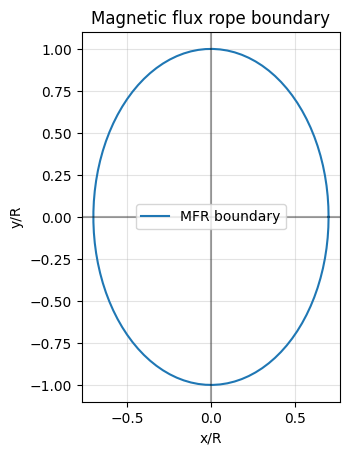

In [60]:
# If we want the plot with the axis normalised by the MFR radius, we can set the following key-word argument to true.
my_model.plot_boundary(normalise_radial_coordinate=True)

# 4. Explore the magnetic and current density fields of the magnetic flux rope

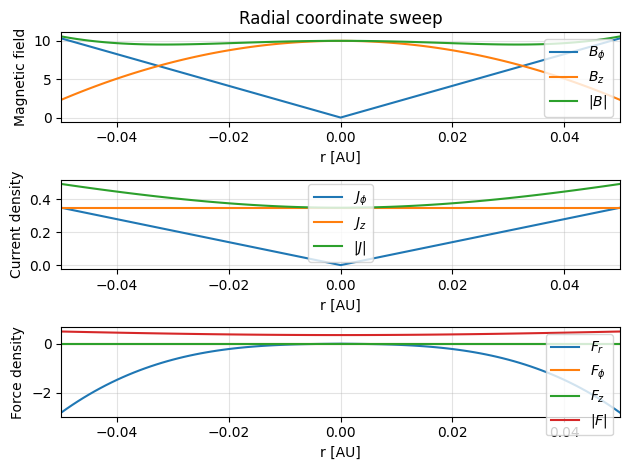

In [61]:
# Next, we can make a radial sweep. The CC model magnetic and current density fields are not dependant on phi, they only depend on the radial coordinate.
r_sweep, B_field, J_field = my_model.radial_coordinate_sweep(two_fold=True, plot=True)

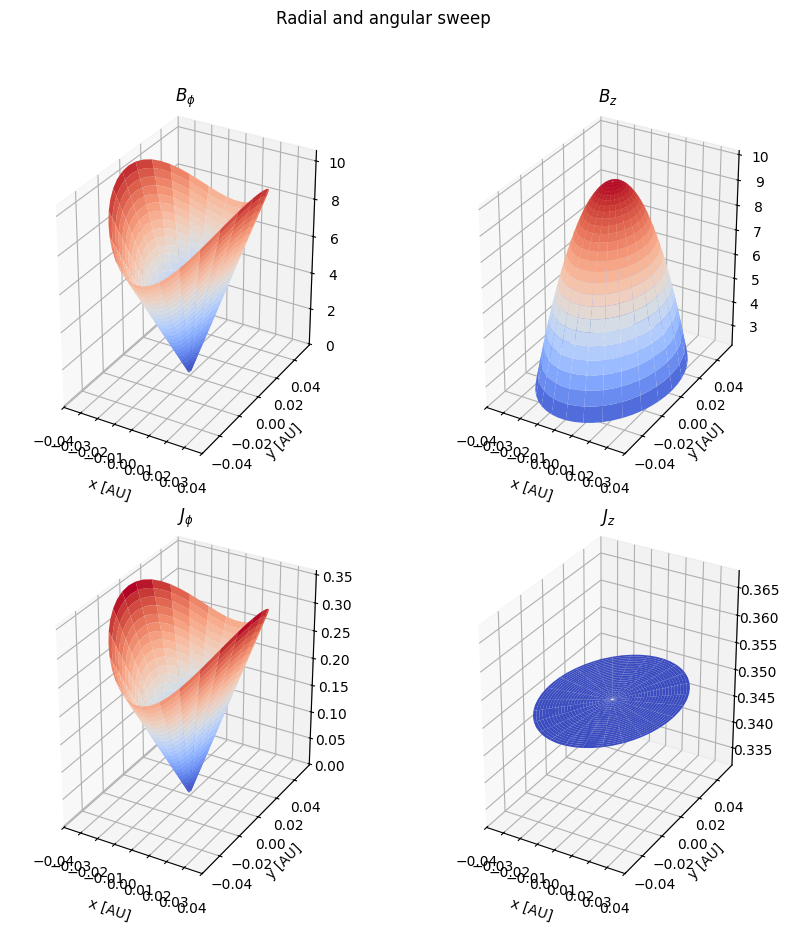

In [62]:
# We can do bot a radial and angluar sweep, showing both magnetic and current density fields. 
x_sweep, y_sweep, B_field, J_field = my_model.radial_and_angular_sweep(plot=True)

## 5. Simulate a spacecraft crossing through the magnetic flux rope

In [63]:
# Finally, we can also simulate a crossing of a spacecraft through the magnetic flux rope model.
# We use the "simulate_crossing" method, which returns a pandas data frame.
df = my_model.simulate_crossing(v_sc=450, y_0=0.3)

df.head()

,time,x,y,z,B_x,B_y,B_z,B,J_x,J_y,J_z,J
0,0.000000,-0.033388,0.015,0.0,-3.575705,-7.959012,3.546681,9.418624,-0.121135,-0.269630,0.349791,0.457960
1,443.978184,-0.032052,0.015,0.0,-3.533175,-7.549772,4.049144,9.267036,-0.119694,-0.255766,0.349791,0.449552
2,887.956367,-0.030717,0.015,0.0,-3.488111,-7.142918,4.527051,9.147808,-0.118168,-0.241983,0.349791,0.441444
3,1331.934551,-0.029381,0.015,0.0,-3.440403,-6.738907,4.980391,9.058340,-0.116551,-0.228296,0.349791,0.433655
4,1775.912735,-0.028046,0.015,0.0,-3.389948,-6.338257,5.409173,8.995800,-0.114842,-0.214723,0.349791,0.426202


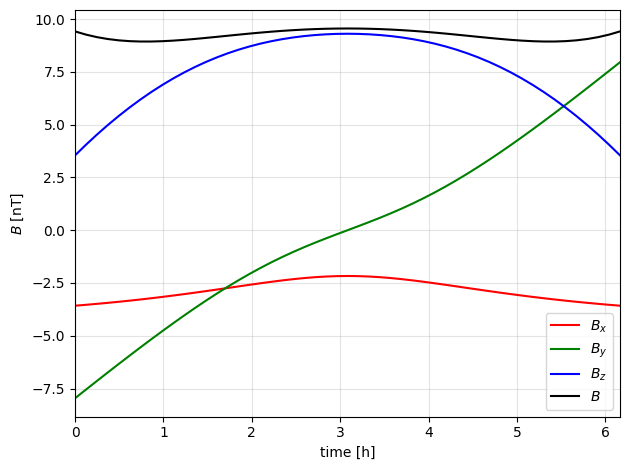

In [64]:
# We can easily plot the magnetic field v.s. time using the "plot_vs_time" method.
my_model.plot_vs_time(df, ["B_x", "B_y", "B_z", "B"], colour=["r", "g", "b", "k"], time_units="h")

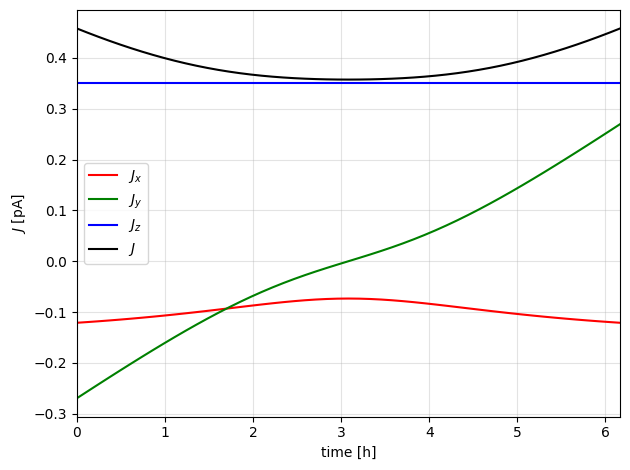

In [65]:
# And we can do the same for the current density.
my_model.plot_vs_time(df, ["J_x", "J_y", "J_z", "J"], colour=["r", "g", "b", "k"], time_units="h")

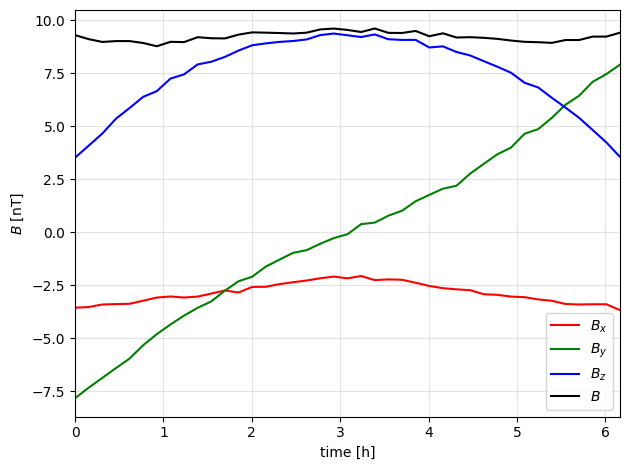

In [66]:
# We can artificially add pseudo-random repeatable noise to the measurements to emulate measurement noise from the spacecraft sensing devices.
df_with_noise = my_model.simulate_crossing(num_points=41, v_sc=450, y_0=0.3, noise_type="gaussian", epsilon=0.08)
my_model.plot_vs_time(df_with_noise, ["B_x", "B_y", "B_z", "B"], colour=["r", "g", "b", "k"], time_units="h")